In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

glass_df = pd.read_csv('/content/glass1.csv')
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
# 1. Exploratory Data Analysis (EDA)
# Check for missing value
glass_df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [20]:
# Check for missing values in the dataset
missing_values = glass_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# If there are missing values, handle them
# For simplicity, if we find missing values, we'll use mean imputation for numerical columns.
if missing_values.any():
    # Impute missing values with the mean for numerical columns
    glass_df.fillna(glass_df.mean(), inplace=True)
    print("Missing values handled with mean imputation.")
else:
    print("No missing values found in the dataset.")


Missing values in each column:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64
No missing values found in the dataset.


In [5]:
# Summary
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


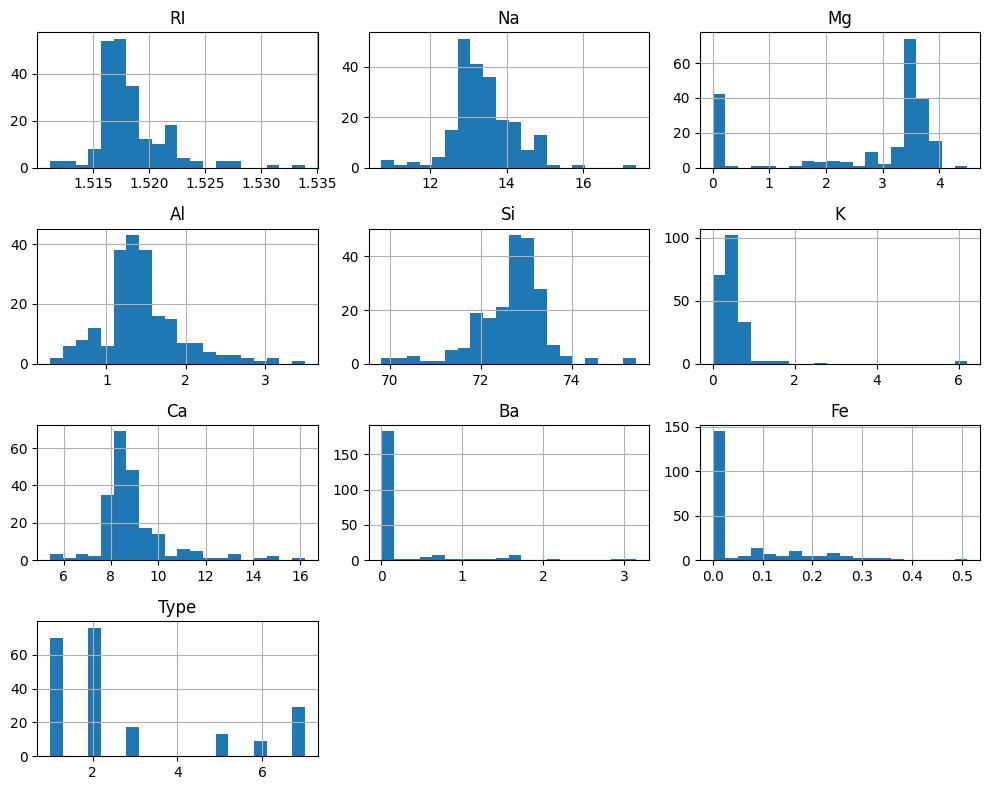

In [6]:
# 2. Data Visualization
# Visualizing distributions with histograms
glass_df.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

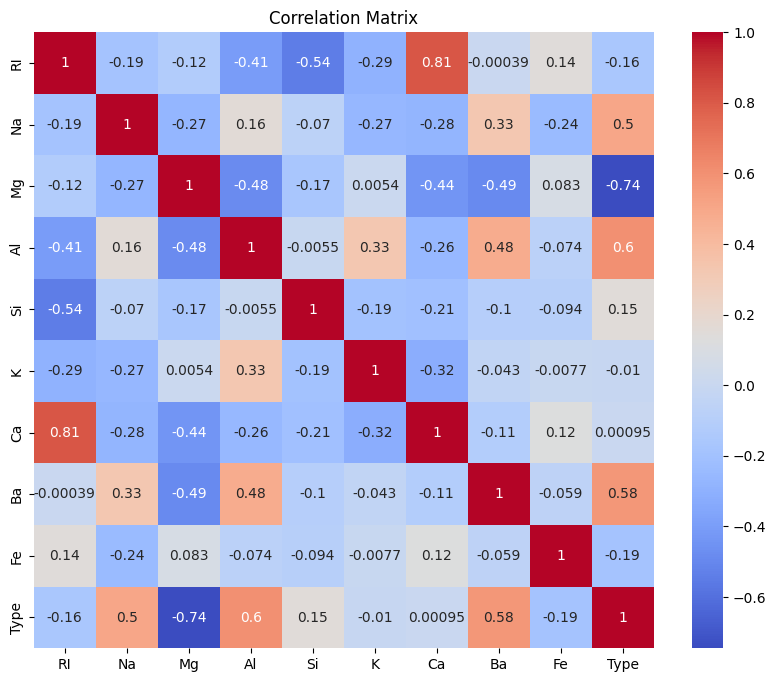

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(glass_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


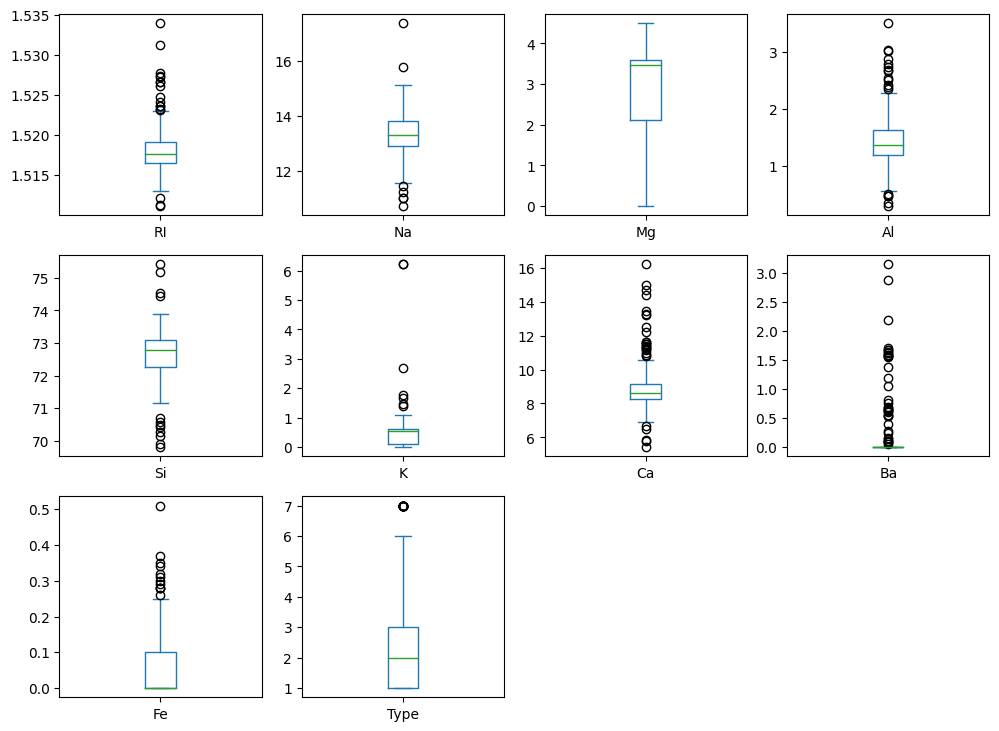

In [8]:
# Boxplots for each feature
glass_df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(12, 12), sharex=False, sharey=False)
plt.show()

In [12]:
# 3. Data Preprocessing

# a. Splitting features (X) and target variable (y)
X = glass_df.drop(columns=['Type'])  # Features (drop 'Type')
y = glass_df['Type']  # Target variable (Type of glass)

In [13]:
#b. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# c. Train-Test Split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [14]:
# 4. Random Forest Model Implementation
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

In [15]:
# Evaluate the Random Forest model
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classification Report
              precision    recall  f1-score   support

           1       0.74      0.89      0.81        19
           2       0.75      0.65      0.70        23
           3       0.67      0.50      0.57         4
           5       0.75      0.50      0.60         6
           6       0.75      1.00      0.86         3
           7       0.91      1.00      0.95        10

    accuracy                           0.77        65
   macro avg       0.76      0.76      0.75        65
weighted avg       0.77      0.77      0.76        65

Confusion Matrix for Random Forest
[[17  2  0  0  0  0]
 [ 4 15  1  1  1  1]
 [ 2  0  2  0  0  0]
 [ 0  3  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0 10]]


In [19]:
# 5. Bagging and Boosting Methods
# a. AdaBoost Classifier
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_classifier.fit(X_train, y_train)
y_pred_ada = ada_classifier.predict(X_test)

# Evaluate AdaBoost
print("AdaBoost Classification Report")
print(classification_report(y_test, y_pred_ada))
print("Confusion Matrix for AdaBoost")
print(confusion_matrix(y_test, y_pred_ada))


AdaBoost Classification Report
              precision    recall  f1-score   support

           1       0.51      0.95      0.67        19
           2       0.38      0.35      0.36        23
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         6
           6       0.60      1.00      0.75         3
           7       1.00      0.40      0.57        10

    accuracy                           0.51        65
   macro avg       0.42      0.45      0.39        65
weighted avg       0.47      0.51      0.45        65

Confusion Matrix for AdaBoost
[[18  1  0  0  0  0]
 [13  8  0  0  2  0]
 [ 4  0  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  0  0  0  3  0]
 [ 0  6  0  0  0  4]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
#b.Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate Gradient Boosting
print("Gradient Boosting Classification Report")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix for Gradient Boosting")
print(confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Classification Report
              precision    recall  f1-score   support

           1       0.75      0.95      0.84        19
           2       0.77      0.74      0.76        23
           3       1.00      0.75      0.86         4
           5       1.00      0.33      0.50         6
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00        10

    accuracy                           0.82        65
   macro avg       0.88      0.79      0.80        65
weighted avg       0.83      0.82      0.80        65

Confusion Matrix for Gradient Boosting
[[18  1  0  0  0  0]
 [ 5 17  0  0  1  0]
 [ 1  0  3  0  0  0]
 [ 0  4  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0 10]]


In [ ]:
''' 1. Bagging and Boosting Methods: Explanation and Differences
Bagging (Bootstrap Aggregating)
Concept: Bagging involves training multiple models (typically decision trees) independently on different subsets of the data,
generated through bootstrapping (sampling with replacement). Each model runs in parallel, and their predictions are combined,
usually through majority voting (for classification) or averaging (for regression).

Boosting
Concept: Boosting focuses on training multiple weak learners (models) sequentially.
 Each model learns from the mistakes (errors) of the previous models. The idea is to correct the errors made by earlier models
 by giving more weight to the misclassified examples.

 Differences Between Bagging and Boosting:


Aspect	                               Bagging	                                                 Boosting

Model Training	         Parallel (independent) training of models	             Sequential (dependent) training of models

Focus	                         Reduces variance                                                   Reduces bias
                         (good for high variance models)	                               (good for underfitting models)


Data Sampling	             Each model gets a random 	                              Each model focuses on correcting
                                subset of data                                         errors of the previous one

Key Algorithm                   	Random Forest	                                       AdaBoost, Gradient Boosting

Suitability       	      Works well with unstable models                              Works well with weak models and improves
                              (like decision trees)	                                         performance iteratively                 '''

In [ ]:
''' 2. How to Handle Imbalance in DataUndersampling:

Randomly reduce the number of samples from the majority class to match the minority class.
 This reduces bias but can result in loss of information from the majority class.
How it works: Randomly remove instances from the majority class to balance the dataset.
Combination of Over- and Undersampling:

A hybrid approach that reduces the number of majority class samples and increases the minority class samples.

Anomaly Detection:

In some cases, you can treat the minority class as an anomaly or outlier and apply anomaly detection methods to detect it.
Ensemble Techniques:

Some ensemble techniques, like Balanced Random Forest and EasyEnsemble, are specifically designed to handle class
imbalance by combining resampling with ensemble learning.

Also we can,
Start by analyzing the class distribution.
Use cross-validation to ensure that the sampling and model training aren't overly biased due to random chance.
Consider a combination of techniques to improve both training data representation and model evaluation.
Handling imbalance effectively requires both modifying the data and tuning the model to account for the uneven distribution of classes.